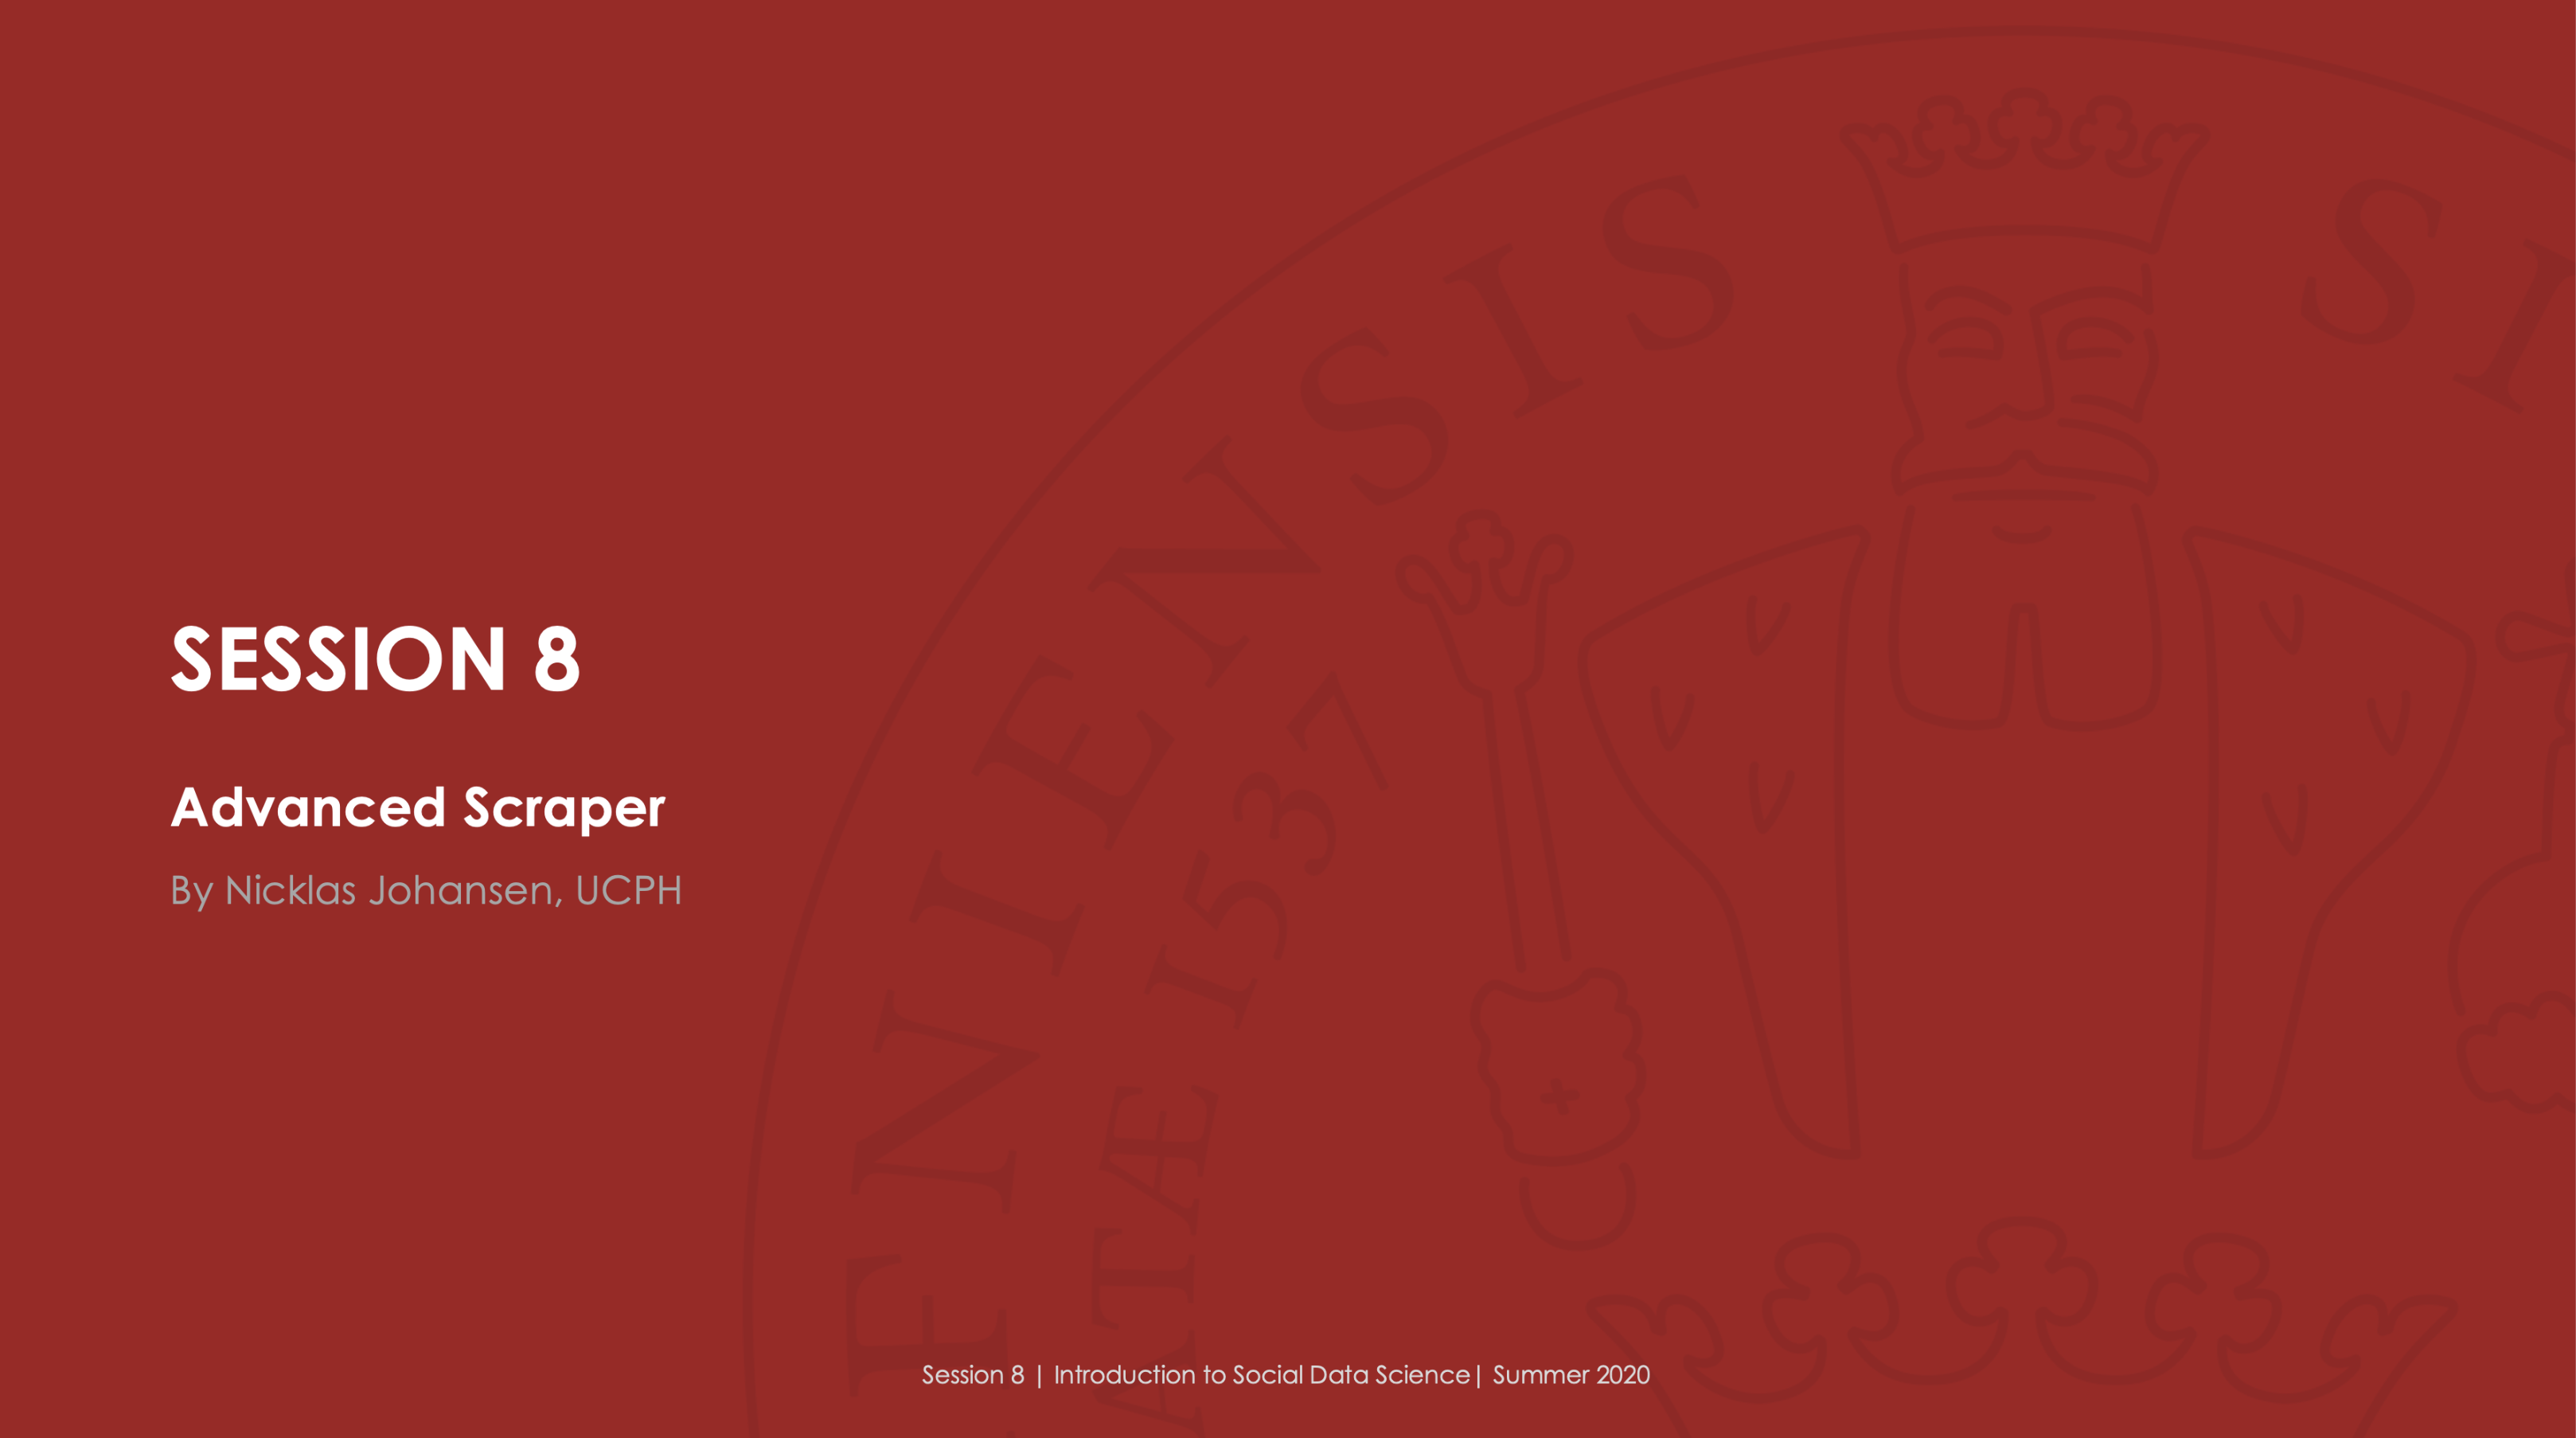

# Session 8: Advanced Scrapers

We will continue to learn new techniques of parsing unstructured text and HTML. This will help you build ***custom datasets*** within just a few hours or days work, that would have taken ***months*** to curate and clean manually. We will learn how to automate browsing and use regex to parse text without html tags.

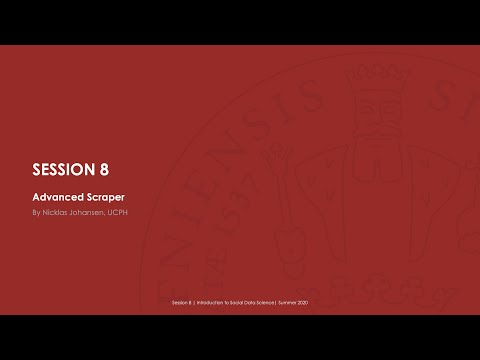

In [95]:
from IPython.display import YouTubeVideo
YouTubeVideo('l-U25EI-fkA', width=640, height=360)

## Agenda

1. Interactions and Automated Browsing
2. Example: nboard
3. Next level scraping
4. Regex
5. Scrapig vs. API
6. Putting something into production?
7. Junior Data Scientist Position

## Interactions and Automated Browsing
Sometimes scraping tasks demand interactions (e.g. login, scrolling, clicking), and a no XHR data can be found easily, so you need the browser to execute the scripts before you can get the data.

Here we use the `Selenium` package in combination with the `ChromeDriver` - you can download the latest release [here](https://chromedriver.chromium.org/downloads). It allows you to animate a browser. 

Make sure to download the driver as well as the newest version of Selenium. "pip install selenium" should do the trick. 

Some developers prefer to you [geckodriver](https://github.com/mozilla/geckodriver/releases) as an alternative to `ChromeDriver`.


In [46]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager


url = 'https:google.com'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)

[WDM] - Cache is valid for [12/08/2020]
[WDM] - Looking for [chromedriver 84.0.4147.30 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/nicklasjohansen/.wdm/drivers/chromedriver/84.0.4147.30/mac64/chromedriver]


In [48]:
#another option if you save the driver in your current folder
#import os
#directory = os.getcwd()
#path = os.path.join(dirname, 'chromedriver')
#driver = webdriver.Chrome(executable_path=path)

### Benifits from autoamting browsing
1. You can access data that are not directly in the HTML code but that is being generating while browsing
2. You can get thorugh login screens and other scraping barriers
3. You can automate browsing behaviour such as scrolling down

## Example: nboards

In [49]:
# step 1: load the webpage we want to scrape in our virtual browser
url = 'https://nboard.dk/search'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)

[WDM] - Cache is valid for [12/08/2020]
[WDM] - Looking for [chromedriver 84.0.4147.30 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/nicklasjohansen/.wdm/drivers/chromedriver/84.0.4147.30/mac64/chromedriver]


In [52]:
# step 2: scroll down the page to load more profiles
import time

url = 'https://nboard.dk/search'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
time.sleep(3)

lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(1)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True


[WDM] - Cache is valid for [12/08/2020]
[WDM] - Looking for [chromedriver 84.0.4147.30 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/nicklasjohansen/.wdm/drivers/chromedriver/84.0.4147.30/mac64/chromedriver]


In [54]:
# step 3: save the soup and keep track of runtime

import time
from bs4 import BeautifulSoup

start_time = time.time()

url = 'https://nboard.dk/search'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)

time.sleep(3)

lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(1)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True

time.sleep(3)

soup = BeautifulSoup(driver.page_source, 'lxml')

print("--- %s seconds ---" % round((time.time() - start_time),2))

[WDM] - Cache is valid for [12/08/2020]
[WDM] - Looking for [chromedriver 84.0.4147.30 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/nicklasjohansen/.wdm/drivers/chromedriver/84.0.4147.30/mac64/chromedriver]


 
--- 193.0 seconds ---


In [60]:
# step 4: use the soup to generate our mapping of urls (profiles) that we want to scrape

names = soup.find_all('span', {'class': 'name'})

urls = []
for i in range(len(names)):
    temp = 'https://nboard.dk/candidate_profile/'+ str(names[i].text)
    temp = temp.replace(' ','-')
    temp = temp.replace('--','-')
    urls.append(temp)

print(urls[1])

https://nboard.dk/candidate_profile/Irene-Katballe


In [81]:
# step 5: scraping profiles 
import requests

name = []
subtitle = []
location = []
resume = []

for i in range(2): #len(urls)
    response = requests.get(urls[i])
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    name.append(soup.find('title').text)
    subtitle.append(soup.find('span', {'class': 'sub-title'}).text)
    location.append(soup.find('span', {'class': 'location'}).text)
    resume.append(soup.find('span', {'class': 'resume'}).text)

df = pd.DataFrame({'name':name, 
                   'subtitle':subtitle, 
                   'location':location, 
                   'resume':resume})
df

,name,subtitle,location,resume
0,Helene Regnell,"Forandringsleder, bæredygtig forretningsudvikling","københavn, Danmark","Stor erfaring fra fødevaresektoren, finans og ..."
1,Irene Katballe,Turnaround | Digitalisering | Indtjeningsforbe...,"aarhus, Danmark","Min fornemste opgave, og det der giver mening ..."


### Next level scrapers

You have know learned some of the fundamentals of collecting and parsing data and should be well suited for your exam project. Though I find it important to adress that you might run into some challenges that we have not learn dealing with yet. Facebook, LinkedIn, Google and all the other big tech firms are battling scrapers and has done all kinds of thing to make it hard for us to steal public data on their sites. I have found som article that you might find interessting.

- [Most Commonly used techniques to Prevent Scraping:](https://medium.com/@betoayesa/using-the-content-as-an-anti-scrape-weapon-draft-9bb10cd30e5c)
- [Advanced Web Scraping Tactics](https://www.pluralsight.com/guides/advanced-web-scraping-tactics-python-playbook)
- [Scraping Sites That Use JavaScript and AJAX](https://oup-arc.com/protected/files/content/file/1505319833942-CH9---Scraping-Sites-that-Use-JavaScript-and-AJAX.pdf)
- [Facebook Scraper 2020: How to Scrape Facebook Group with Python](https://www.bestproxyreviews.com/facebook-scraper/)

# Extracting patterns from Raw Text

of course you already now your basic string operations:

`string.split
string.strip
string.replace`

And sometimes this will be enough, but sometimes it is not.

# Regular Expressions
![](https://cdn-images-1.medium.com/max/800/0*j1f-EFL7TDtf6K0o.jpg)

**Wiki:**  
"A regular expression (shortened as regex) is a sequence of characters that define a search pattern. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation. It is a technique developed in theoretical computer science and formal language theory."

**Key take away:**  
Learning the of Regular Expressions for extracting patterns in strings.   
Very valuable when cleaning and validating data, and for information extraction from raw text.


In [88]:
import re
line = "should we use regex more often? let me know at nj@sodas.ku.dk"
match = re.search(r'[\w\.-]+@[\w\.-]+', line)
match.group(0)

'nj@sodas.ku.dk'

Regex can be a little terrifying:

`pattern = '(?:(?:\r\n)?[ \t])*(?:(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*)|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*:(?:(?:\r\n)?[ \t])*(?:(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*)(?:,\s*(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*))*)?;\s*)'`


However creating regular expressions is also fun, fun as in Suduko, and it is extremely valuable when working with any kind of text: e.g. Automating otherwise tedious manual tasks when cleaning a data set, searching, extracting and substituting specific patterns.

Examples could be: 
- Extract currency and amount from raw text: $ 20, 10.000 dollars 10,000 £
- email addresses: here you want to design a pattern (as above), that captures only the uses of @ within an email.
- urls. Here you are trying to define all the different ways of writing urls (https, http, no http). 
- Dates. Again many variations: 17th of June 2017, 06/17/17 or 17. June 17
- addresses, 
- phone numbers: 8888888 or 88 88 88 88 or +45 88 88 88 88,
- emojiies in text. Capturing all the different ways of expressing smiley faces with one regular expression. 




**Regular Expression syntax**

Ressources:
Best way to learn is to practice, and with interactive examples. Two good ressources are here:
* Community and interactive playground [here](http://regexr.com/)
* Interactive tutorial [here](https://regexone.com/)
* or you can use your notebook.

Lookup all special characters [here](https://www.regular-expressions.info/refquick.html)

* \+ = 1 or more times  -- e.g. "a+" will match: "a", and "aaa"
* \* = 0 or more times  -- e.g. "ba*" will match: "b", and "ba", and "baaa"
* {3} = exactly three times --- e.g. "ba{3}" will match "baaa", but not "baa"
* ? = once or none
* \\ = escape character, used to find characters that has special meaning with regex: e.g. \+ \*
* [] = allows you to define a set of characters
* ^ = applied within a set, it becomes the inverse of the set defined. Applied outside a set it entails the beginning of a string. $ entails the end of a string.
* . = any characters except line break
* | = or statement. -- e.g. a|b means find characters a or b.
* \d = digits
* \D = any-non-digits.
* \s = whitespace-separator

Sequences
* (?:) = Defines a Non-capturing group. -- e.g. "(?:abc)+", will match "abc" and "abcabcabc", but not "aabbcc"
* (?=)	= Positive lookahead - only match a certain pattern if a certain pattern comes after it.
* (?!)	= Negative lookahead - only match a certain pattern if **not** a certain pattern comes after it.
* (?<=)	= Positive lookbehind - only match a certain pattern if a certain pattern precedes it.
* (?<!) = Negative lookbehind - only match a certain pattern if **not** a certain pattern precedes it.

## Regular expressions: define - inspect - refine
You are trying to balance getting (and learning/exploring) all the different variations of e.g. an emojii. while also making sure not to include ordinary use of :. 

This means iterating through many steps, some expressions being too broad others being to narrow, and others not matching all that you need.

I developed a small module for this that you can use. Just run the following piece of code to download, save and import the module.

```python 
# download module
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
# write script to your folder to create a locate module
with open('explore_regex.py','w') as f:
    f.write(response.text)
# import local module
import explore_regex as e_re
```

## Lets do an example
first we get a dataset to play with. 
We download the following link using pandas and dump it to your local machine using the `pd.to_csv()` method.

In [89]:
import pandas as pd
import re
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/danish_review_sample.csv'
df = pd.read_csv(path2data)
df.to_csv('danish_review_sample.csv',index=False)

digit_re = re.compile('[0-9]+') # compiled regular expression for matching digits
df['hasNumber'] = df.reviewBody.apply(lambda x: len(digit_re.findall(x))>0) # check if it has a number
sample_string = '\n'.join(df[df.hasNumber].sample(2000).reviewBody)

In [90]:
sample_string

'Jamen har intet at brokke mig over. Bestilte min mus kl 12, og dagen efter havde jeg den i hånden. Perfekt levering fra Dataworld, og jeg er da ked af at der er folk der har haft negative oplevelser med Dataworld.\nBestilte vare hos dem, alt gik som det skulle dog havde de forholdsvis lang leveringstid(ikke kun 3 lev. dage. som skrevet på hj-side) i forhold til andre webshops men alt i alt en god oplevelse og bruger dem sikkert igen hvis de har varen og er billigst.\nJeg har købt 2 x PS3 spil.... Super pris og hurtig levering.....\r\nHvis udvalget havde været lidt bredere indenfor spil etc. havde jeg med garanti købt mange flere...\r\nMen absolut et sted jeg vil handle igen+++++\nAlt forløb uden problemer . Ikke det varen endnu da det er gaver som gives om ca 1 månede .\nHvis du kan nøjes med de visitkort du skal bruge og ikke lader dig lokke af ca 3333 andre mærklige ting de vil sælge dig undervejs er det et rigtig godt sted.\r\nDu skal afsætte en del tid til at bestille da der er si

In [41]:
import explore_regex as e_re
%matplotlib inline

In [92]:
# money example
#explore_money = ExploreRegex(sample_string)
explore_money = e_re.ExploreRegex(sample_string)

first = 'kr'
second = '[0-9]+kr'
third = '[0-9]+(?:[,.][0-9]+)?kr'
fourth = '[0-9]+(?:[,.][0-9]+)?\s{0,2}kr'
final = '[0-9]+(?:[,.][0-9]+)?\s{0,5}kr(?:oner)?'

patterns = [first,second,third,fourth,final]

for pattern in patterns:
    explore_money.explore_difference(pattern,patterns[0])

explore_money.explore_pattern(second)

------ Pattern: kr	 Matched 1063 patterns -----
------ Pattern: kr	 Matched 1063 patterns -----
Found 0 overlaps between the expressions:

        pattern1: kr 	 and

        pattern2: kr

        1063 included in pattern1 and not in the pattern2

        1063 was included in pattern2 and not in pattern1
------ Pattern: [0-9]+kr	 Matched 80 patterns -----
------ Pattern: kr	 Matched 1063 patterns -----
Found 160 overlaps between the expressions:

        pattern1: [0-9]+kr 	 and

        pattern2: kr

        0 included in pattern1 and not in the pattern2

        983 was included in pattern2 and not in pattern1
------ Pattern: [0-9]+(?:[,.][0-9]+)?kr	 Matched 80 patterns -----
------ Pattern: kr	 Matched 1063 patterns -----
Found 160 overlaps between the expressions:

        pattern1: [0-9]+(?:[,.][0-9]+)?kr 	 and

        pattern2: kr

        0 included in pattern1 and not in the pattern2

        983 was included in pattern2 and not in pattern1
------ Pattern: [0-9]+(?:[,.][0-9]+)

------ Pattern: kr	 Matched 1063 patterns -----
------ Pattern: [0-9]+kr	 Matched 80 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?kr	 Matched 80 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}kr	 Matched 336 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,5}kr(?:oner)?	 Matched 336 patterns -----


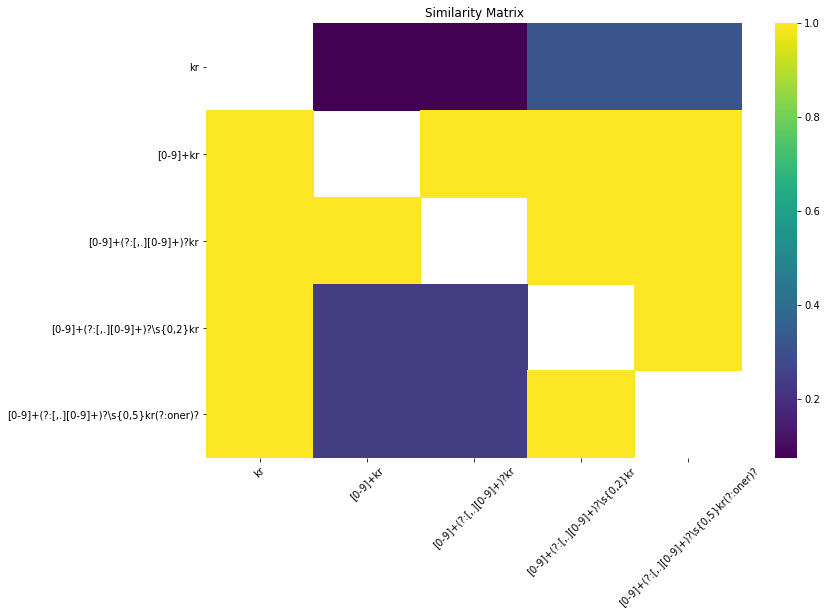

In [43]:
explore_money.report('soft')

------ Pattern: kr	 Matched 1063 patterns -----
------ Pattern: [0-9]+kr	 Matched 80 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?kr	 Matched 80 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}kr	 Matched 338 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,5}kr(?:oner)?	 Matched 338 patterns -----


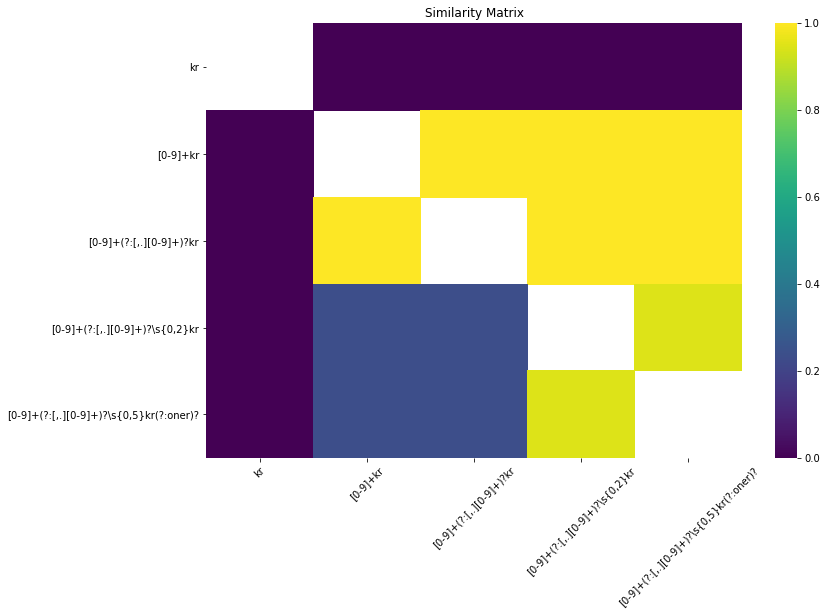

In [93]:
explore_money.report('hard')

In [94]:
print(explore_money.patterns[3])
print(explore_money.patterns[4])
print('\n')
explore_money.explore_difference(explore_money.patterns[3],explore_money.patterns[4])

[0-9]+(?:[,.][0-9]+)?\s{0,2}kr
[0-9]+(?:[,.][0-9]+)?\s{0,5}kr(?:oner)?


------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}kr	 Matched 338 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,5}kr(?:oner)?	 Matched 338 patterns -----
Found 676 overlaps between the expressions:

        pattern1: [0-9]+(?:[,.][0-9]+)?\s{0,2}kr 	 and

        pattern2: [0-9]+(?:[,.][0-9]+)?\s{0,5}kr(?:oner)?

        0 included in pattern1 and not in the pattern2

        0 was included in pattern2 and not in pattern1


([], [])

# Scraping vs API
- Do not look for the backdoor if there is a front.
    - Use the API if provided.


- Create a developer account. 
- Learn how to Authenticate.
    - Read the docs. 
- Construct your queries

**Examples**
- Twitter, YouTube, Reddit, Facebook, Github, Stackexchange and many more...
- Google Translate, Transcribe and ML APIS


# Putting something into production?
Right now you are working locally on your computer. That is fine for small project, but some might become data scientist working in organizations that would like to put your work into production. Then we need to be really good at version control (git) but also working with servers and databases. This is obviously not part of this course but you might still want to check [RunDeck ](https://www.rundeck.com/open-source) out. It is a open-source tool you can use to orchestra your scripts. Let's say you want your scraper to run every day at 08:00 am, then you can schedule that job in RunDeck or similar tools.

# Junior Data Scientist Position
Stores and other public places has something called Popular Times when you google them. It indicates how many peoples geolokation are at the place in diffrent time interval. A friend of mine, who is a business owner, is looking to hire a junior data scientist to scrape this information. If you are up for a challenge try to collect the data on [this url](https://www.google.com/search?sxsrf=ALeKk02OxWY1MFf29v-44s8Bnozf6EJyHA%3A1597134428470&ei=XFYyX6OTHK_qrgS714u4Ag&q=torvehallerne&oq=torvehallerne&gs_lcp=CgZwc3ktYWIQAzIOCC4QxwEQrwEQywEQkwIyCwguEMcBEK8BEMsBMgsILhDHARCvARDLATILCC4QxwEQrwEQywEyCwguEMcBEK8BEMsBMgsILhDHARCvARDLATIFCAAQywEyCwguEMcBEK8BEMsBMgsILhDHARCvARDLATIFCAAQywE6BwguECcQkwI6BAgAEEM6BwgAEBQQhwI6AggAOg0ILhDHARCvARAnEJMCOgQIIxAnOgUILhCRAjoFCAAQkQI6CAguEMcBEKMCOgoILhDHARCvARBDOgIILjoICC4QxwEQrwE6CwguEMcBEK8BEJMCUJKQAVismgFglZsBaABwAHgBgAGuAYgB7AySAQM0LjmYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=psy-ab&ved=0ahUKEwijsZGy3ZLrAhUvtYsKHbvrAicQ4dUDCAw&uact=5) and reach me by email. You might as well get a job. 
    